In [ ]:
from google.colab import files
data=files.upload()

Saving Inc_Exp_Data.csv to Inc_Exp_Data (1).csv


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Load data
df = pd.read_csv("Inc_Exp_Data.csv")

In [ ]:
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,5000,8000,3,2000,64200,1
1,6000,7000,2,3000,79920,1
2,10000,4500,2,0,112800,1
3,10000,2000,1,0,97200,1
4,12500,12000,2,3000,147000,1


In [ ]:
df.shape

(50, 6)

In [ ]:
df.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


In [ ]:
XX=df

In [ ]:
X_train, X_test= train_test_split(XX, test_size=0.2, random_state=42)
# Reset index of the training set
X_train.reset_index(drop=True, inplace=True)
# Display the shapes of the training and testing sets
print("Training set shape :", X_train.shape)
print("Testing set shape :", X_test.shape)

Training set shape : (40, 6)
Testing set shape : (10, 6)


In [ ]:
# Select features
X_train.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,23400,5000,3,0,292032,1
1,12500,12000,2,3000,147000,1
2,50500,20000,3,0,581760,2
3,19000,9000,2,0,218880,1
4,10000,2000,1,0,97200,1


In [ ]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
X_train['Cluster'] = kmeans.fit_predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


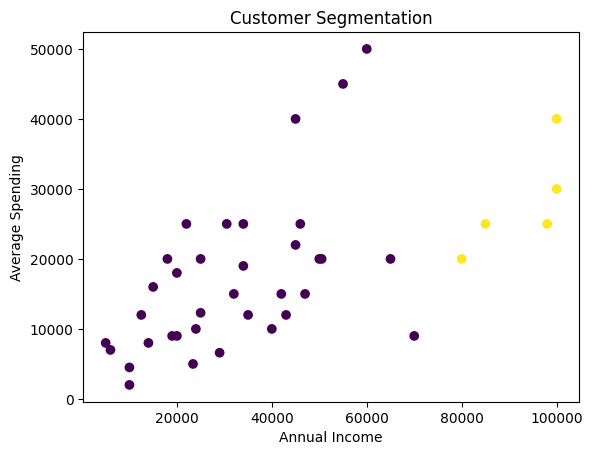

In [ ]:

# Visualize the clusters
plt.scatter(X_train['Mthly_HH_Income'], X_train['Mthly_HH_Expense'], c=X_train['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Average Spending')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
# Predict clusters for the test set
X_test_clusters = kmeans.predict(X_test)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_test, X_test_clusters)
print("Silhouette Score:", silhouette_avg)

# Calculate inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)


Silhouette Score: 0.7154606663600291
Inertia: 1318006040525.8857
